# Connolly 1999

In [6]:
import bruges
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import welly

w = welly.Well.from_las("R-39.las")

In [11]:
dtp = w.data['DT4P']
rho = w.data['RHOB']
dts = w.data['DT4S']
depth = dtp.basis

vp = 1e6 / dtp
vs = 1e6 / dts

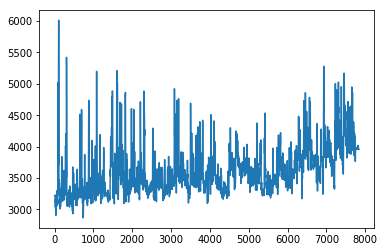

In [17]:
plt.plot(vp)

## Figure 1

In [50]:
ai = vp * rho
ei30 = bruges.rockphysics.elastic_impedance(vp, vs, rho, theta1=30, k=0.15)

/home/matt/anaconda3/envs/py36/lib/python3.6/site-packages/bruges/rockphysics/elastic.py:58: RuntimeWarning: invalid value encountered in power
  ei = alpha**a * beta**b * rho**c


(0, 300)

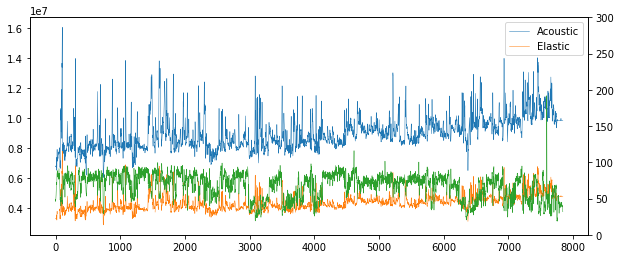

In [51]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(vp * rho, lw=0.5, label="Acoustic")
ax.plot(ei30, lw=0.5, label="Elastic")
ax.legend()

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(w.data['GR'], lw=0.5, c='C2', label='GR')
ax2.set_ylim(0, 300)

## Figure 2

Normalized EI.

In [52]:
ei30 = bruges.rockphysics.elastic_impedance(vp, vs, rho, theta1=30, normalize=True)

/home/matt/anaconda3/envs/py36/lib/python3.6/site-packages/bruges/rockphysics/elastic.py:58: RuntimeWarning: invalid value encountered in power
  ei = alpha**a * beta**b * rho**c


(2300, 2450)

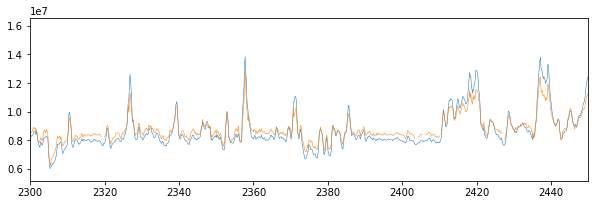

In [53]:
plt.figure(figsize=(10, 3))
plt.plot(depth, ai, lw=0.5)
plt.plot(depth, ei30, lw=0.5)
plt.xlim(2300, 2450)

## Figure 7

In [70]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.array([ai, ei30]).T, columns=['EI30', 'AI'])

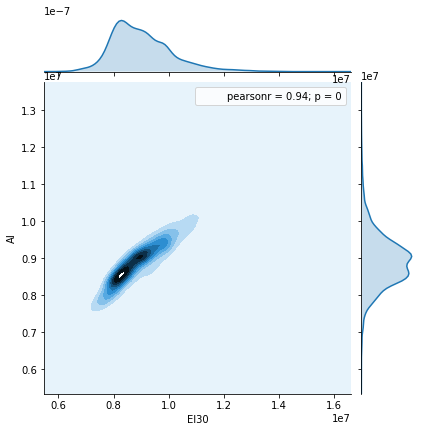

In [73]:
import seaborn as sns

sns.jointplot(df.EI30, df.AI, kind='kde')